# Lab 2: PyTorch Basics

In [1]:
import torch
import numpy as np

In [2]:
from torch import nn

In [1]:
import matplotlib.pyplot as plt

## Lab Assignment: MNIST Classification Task

Design your own MNIST Classification model (see video recording for explanation of MNIST dataset). You may choose your own hyperparameters, including:
- Number of layers
- Number of neurons in each layer
- Learning rate
- Number of training epochs
- Optimizer

Using a fully-connected network, you should be able to accomplish >90% accuracy on the test set. Please report your hyperparameter selections and accuracy in a summary at the end of the notebook.

To load the MNIST dataset, we will use `torchvision`, which contains the datasets and has useful transformations. Start by defining the batch size you want for your training and test sets

In [3]:
import torchvision


train_dataset =  torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

Create training and cross validation set

In [5]:
train_dataset_small, cv_dataset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset.targets)-.2*len(train_dataset.targets)),int(0.2*len(train_dataset.targets))])

In [6]:
train_batch_size = 128 #Define train batch size
test_batch_size  = 1024 #Define test batch size (can be larger than train batch size)

train_loader = torch.utils.data.DataLoader(train_dataset_small, batch_size=train_batch_size, shuffle=True)

cv_loader = torch.utils.data.DataLoader(cv_dataset,batch_size=test_batch_size)

Define the network

In [ ]:
class Network(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super(Network, self).__init__() 
        # Use fully connected layers, softmax, and dropout with p=0.2
        self.layer1 = nn.Linear(input_dim,hidden_dim)
        self.act1 = nn.Softmax(dim=1)
        self.layer2 = nn.Linear(hidden_dim,hidden_dim)
        self.act2 = nn.Softmax(dim=1)
        self.layer3 = nn.Linear(hidden_dim,output_dim)
        self.act3 = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, input):
        # Layer 1
        x = self.layer1(input)
        x = self.dropout(x)
        x = self.act1(x)
        # Layer 2
        x = self.layer2(x)
        x = self.dropout(x)
        x = self.act2(x)
        # Layer 3
        x = self.layer3(x)
        output = self.act3(x)
        
        
        return output


Define the optimizer, loss, number of neurons in the hidden layers, and the number of epochs

In [37]:
model = Network(784,387,10) # The size of the hidden layer is the mean of the input and output layers
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fnc = nn.CrossEntropyLoss()
epochs = 300

Train the model and report training/cv/testing loss/accuracy

In [38]:
LList_Train = []
LList_Test = []
AList = []

for epoch in range(epochs):
    print(epoch)

    for train_sample in train_loader:

        
        # Calculate training loss on model
        X = torch.reshape(train_sample[0],(train_sample[0].shape[0],784))
        y = train_sample[1]
        
        y_pred = model(X)
        
        # Training Loss on the training set
        loss = loss_fnc(y_pred,y)
        LList_Train.append(loss.item())
        
        
        # Backprop 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

    
    with torch.no_grad():

        for cv_sample in cv_loader:

            # Find the cross-validation error
            X = torch.reshape(cv_sample[0],(cv_sample[0].shape[0],784))
            y = cv_sample[1]

            y_pred = model(X)

            loss_test = loss_fnc(y_pred,y)
            LList_Test.append(loss_test.item())

            correct = (torch.argmax(y_pred, dim=1)==y).type(torch.FloatTensor)

            AList.append(correct.mean())


# Find the accuracy on the whole test set
with torch.no_grad():
    
    X_test = test_dataset.data.flatten(start_dim=1).type(torch.FloatTensor)
    y_test_pred = model(X_test)
    y_test = test_dataset.targets

    loss_test = loss_fnc(y_test_pred,y_test)

    correct = (torch.argmax(y_test_pred, dim=1)==y_test).type(torch.FloatTensor)

    testaccuracy.append(correct.mean())

testaccuracy

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[tensor(0.7725), tensor(0.8580), tensor(0.8142), tensor(0.9105)]

Plot the training loss, cv loss, and cv accuracy.

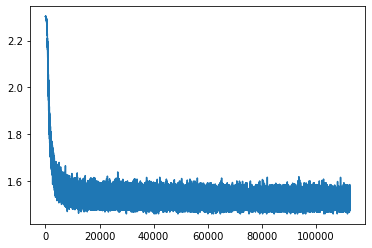

In [39]:
plt.title("Training Loss (Over each batch seen)")
plt.xlabel("Training Samples Seen")
plt.ylabel("Loss")
plt.plot(LList_Train)

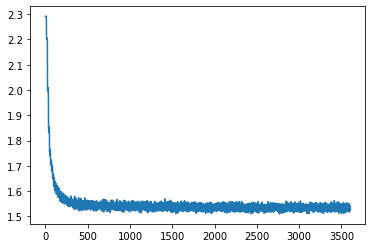

In [40]:
plt.title("Cross-Validation Set Loss (Over each batch seen)")
plt.xlabel("Cross-Validation Batches Seen")
plt.ylabel("Loss")
plt.plot(LList_Test)

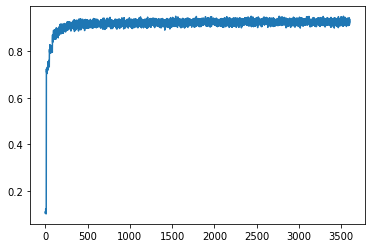

In [41]:
plt.title("Cross-Validation Set Accuracy (Averaged over each batch seen)")
plt.xlabel("Cross-Validation Batches Seen")
plt.ylabel("Accuracy")
plt.plot(AList)

### Summary

#### A. The hyper parameters that I experimented with to find the optimal performance were:

- The learning rate
    - Between 0.001 and 0.1, grid search
- The number of hidden layers
    - Between 1-3, grid search
- The dimension of the hidden layers
    - Between 1-1000, random search
- The activation function
    - Tanh
    - ReLu
    - Softmax
- Training epochs
    - Between 1-40, random search
- Other
    - I tried dropout layers

#### B. For the model that achieved the best performance, I used the following parameters:

1. Layers: 3
2. Neurons in each layer: 387
3. Activation function: softmax
4. Learning rate: 0.001
5. Training epochs: 300
6. Other hyperparameters: Two dropout layers at p=0.2

#### C. The accuracy for my best performing model on the test set was `91.05%`.

A limiting factor in obtaining a better training accuracy was the speed of each epoch. It took a long time to train the model, and when I tried to increase the number of workers in the dataloader sometimes workers would randomly fail. Next time I will use remote resources such as AMATH's computing resources, which should greatly speed up the process and allow for more fine-tuning of hyper parameters.